# Losses, Regularization, Evaluation

## Regularization

In [3]:
import sys
sys.path.append('/Users/jianlan/Desktop/prtools')
import prtools as pr
import numpy as np
import matplotlib.pyplot as plt

### Exercise 3.3

Lamda: 0
Square Error: 0.9460671164070823
---
Lamda: 0.01
Square Error: 0.9460386454104293
---
Lamda: 3
Square Error: 0.9434708527117674
---
Lamda: 10
Square Error: 0.9482087999260089
---


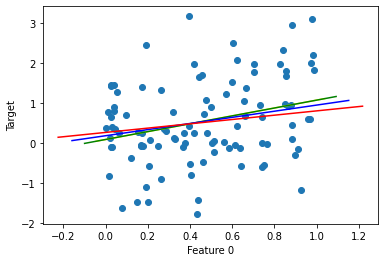

In [4]:
# Exercise 3.3
# input data set where the inputs x are drawn uniformly from the interval [0,1]
# output data add gaussian noise to the inputs
tr_size = 100
ts_size = 1000
x_train = np.random.rand(tr_size,1)
y_train = x_train + np.random.randn(tr_size,1)
x_test = np.random.rand(ts_size,1)
y_test = x_test + np.random.randn(ts_size,1)
# generate regression training data set
train_set = pr.gendatr(x_train,y_train)
# generate regression test data set 
test_set = pr.gendatr(x_test,y_test)
# regularizor from 0.1 to 100
regu_paras = [0,0.01,3,10]
color_list = ['yellow','green','blue','red']
# list storing diffrent regressors with different regularisation parameters
regre_w = []
for regu_para in regu_paras:
    w = pr.ridger(train_set,(regu_para))
    regre_w.append(w)
# plot 
pr.scatterr(train_set)
i = 0
# compute the square error for different lamdas in the test set
# apply regressor
for w in regre_w:
    pr.plotr(w,color_list[i])
    b = test_set*w
    e = pr.testr(b)
    print('Lamda: '+str(regu_paras[i])+'\n'+'Square Error: '+str(e)+'\n'+'---')
    i=i+1

determine which value for the regularization parameter gives, the best performance (training set size 2,10,100; parameters in range [10^-3,10^3])

possible way to find the optimal parametes (prcrossval)

values around 3 to be fairly optimal

## The Lasso

Another way of regularizing that is popular is through an **L1** norm instead of the **L2 norm**.

LASSO (least shrinkage and selection operator) has the following advantage:
- is able to result in a selection of features
- leads to a reduction of the number of features that the final regressor depends on 

### Exericise 3.7

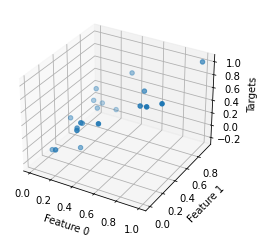

In [5]:
# 2D regression problem
tr_size = 20
x_train = np.random.rand(tr_size,2)
# np.reshape 
y_train = x_train[:,0].reshape((tr_size,1))+0.2*np.random.randn(tr_size,1)
# training data set
train_set = pr.gendatr(x_train,y_train)
# regularization parameters 
regu_paras = [0,0.01,3,10]
color_list = ['yellow','green','blue','red']
# list storing diffrent regressors with different regularisation parameters
regre_w = []
for regu_para in regu_paras:
    w = pr.ridger(train_set,(regu_para))
    regre_w.append(w)
# plot 
pr.scatterr(train_set)


## Learning Curves

Learning Curves show different classificcation errors for different size of traning data set.

In this section, it presents different learning curves for different classifiers.

### Exercise 3.14 

Highleyman dataset 2000 by 2 prdataset with 2 classes: [1000 1000]


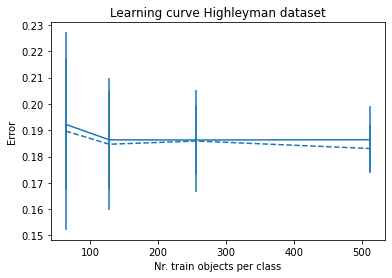

In [21]:
# training dataset size
tr_size = 1000
train_set = pr.gendath([tr_size,tr_size])
print(train_set)
# train_size
tr_sizes = [64,128,256,512]
# repead times
re_times = 50
# learning curve neareset mean classifer
# e_nmc = pr.cleval(train_set,pr.nmc(),tr_sizes,re_times)
# learning curve linear discriminant classifier
e_ldc = pr.cleval(train_set,pr.ldc(),tr_sizes,re_times)
# # learning curve quadratic discriminant classifier
# e_qdc = pr.cleval(train_set,pr.qdc(),tr_sizes,re_times)


## Feature Curves

Feature Curves shows the classification error of a classifier trained with different numbers of features.

There are several points to be discussed:
- How does feature curve change with different numbers of features for different classifiers?
- How does feature curve behave with different training samples?

### Exericise 3.19

In [23]:
pr.read_mat("mfeat_zer")

## Cross-Validation

### Exercise 3.20

In [37]:
# cross validation
# generate a banana shaped classes
data_size = 10
a = pr.gendatb([data_size,data_size],1)
cv_folds = [2,4,6,8]
re_times = 10
e_nn = pr.prcrossval(a,pr.knnc(),k=2,nrrep=re_times)


In [33]:
help(pr.prcrossval)


Help on function prcrossval in module prtools.prtools:

prcrossval(a, u, k=10, nrrep=1, testfunc=<function testc at 0x7fc2d7cca040>)
    Performance estimation using crossvalidation
    
           E = prcrossval(A,U,K,NRREP)
    
    Estimate the classification error E of (untrained) mapping U on
    dataset A by using K-fold (stratified) crossvalidation. If required,
    the crossvalidation can be repeated NRREP times, to get a better
    estimate.
    
    Example:
    a = gendatb()
    u = nmc()
    e = prcrossval(a,u,k=10)



### 